## Bank-Full Exploratory Data Analysis

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

## Features Description

Input variables:
bank client data:
1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no") \

related with the last contact of the current campaign:

9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric) \

other attributes:

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17. y - has the client subscribed a term deposit? (binary: "yes","no")

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import scipy.stats as ss
import warnings 
warnings.filterwarnings("ignore")

## Overview

In [2]:
df = pd.read_csv("bank-full.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40594,28,management,single,tertiary,no,5474,no,no,cellular,28,jul,486,5,-1,0,unknown,yes
7446,48,admin.,married,tertiary,no,960,yes,no,unknown,29,may,286,3,-1,0,unknown,no
14666,38,housemaid,married,secondary,no,0,no,no,cellular,15,jul,105,7,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data = pd.DataFrame({'Columns' : df.columns, 'dataType' : df.dtypes.values, 
                  'null' : [df[i].isna().sum() for i in df.columns],
                  'null percentage' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
                  'Nunique' : [df[i].nunique() for i in df.columns],
                  'uniqueSample' : [list(pd.Series(df[i].unique()).sample(2)) for i in df.columns]}).reset_index(drop = True)

data.sort_values(by = "null", ascending=False)

,Columns,dataType,null,null percentage,Nunique,uniqueSample
0,age,int64,0,0.0,77,"[79, 19]"
9,day,int64,0,0.0,31,"[25, 27]"
15,poutcome,object,0,0.0,4,"[unknown, other]"
14,previous,int64,0,0.0,41,"[30, 40]"
13,pdays,int64,0,0.0,559,"[558, 315]"
12,campaign,int64,0,0.0,48,"[30, 31]"
11,duration,int64,0,0.0,1573,"[565, 917]"
10,month,object,0,0.0,12,"[feb, jan]"
8,contact,object,0,0.0,3,"[cellular, unknown]"
1,job,object,0,0.0,12,"[housemaid, self-employed]"


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [9]:
df.describe(include = "object").T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


## Data Preprocessing

In [10]:
df.isnull().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
label_encoder = LabelEncoder()
df["job_encode"] = label_encoder.fit_transform(df["job"])
df["marital_encode"] = label_encoder.fit_transform(df["marital"])
df["housing_encode"] = label_encoder.fit_transform(df["housing"])
df["default_encode"] = label_encoder.fit_transform(df["default"])
df["loan_encode"] = label_encoder.fit_transform(df["loan"])
df["poutcome_encode"] = label_encoder.fit_transform(df["poutcome"])
df["education_encode"] = label_encoder.fit_transform(df["education"])
df["y_encode"] = label_encoder.fit_transform(df["y"])

categorical_column = ["job_encode", "marital_encode", "housing_encode", "default_encode", "loan_encode", "poutcome_encode", "education_encode", "y_encode"]

In [13]:
#Mencari data yang duplicate
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               45211 non-null  int64 
 1   job               45211 non-null  object
 2   marital           45211 non-null  object
 3   education         45211 non-null  object
 4   default           45211 non-null  object
 5   balance           45211 non-null  int64 
 6   housing           45211 non-null  object
 7   loan              45211 non-null  object
 8   contact           45211 non-null  object
 9   day               45211 non-null  int64 
 10  month             45211 non-null  object
 11  duration          45211 non-null  int64 
 12  campaign          45211 non-null  int64 
 13  pdays             45211 non-null  int64 
 14  previous          45211 non-null  int64 
 15  poutcome          45211 non-null  object
 16  y                 45211 non-null  object
 17  job_encode  

## Exploratory Data Analysis

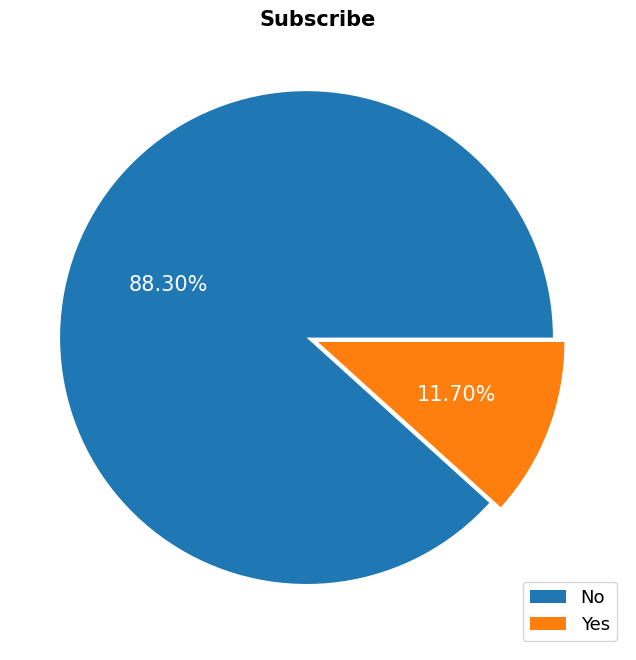

In [15]:
plt.figure(figsize = (12, 8))
plt.title('Subscribe', size = 15, fontweight = 'bold')
labels = 'No', 'Yes'
plt.pie(df['y'].value_counts(), autopct = '%.2f%%', 
        textprops = {'fontsize' : 15, 'color' : 'white'}, explode = (0.05,0))
plt.legend(labels, loc='lower right', fontsize = 13)
plt.show()

In [16]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

> From the output obtained, there are 5289 (11.70%) who are subscribed, while those who are not subscribed are 39922 (88.3%)

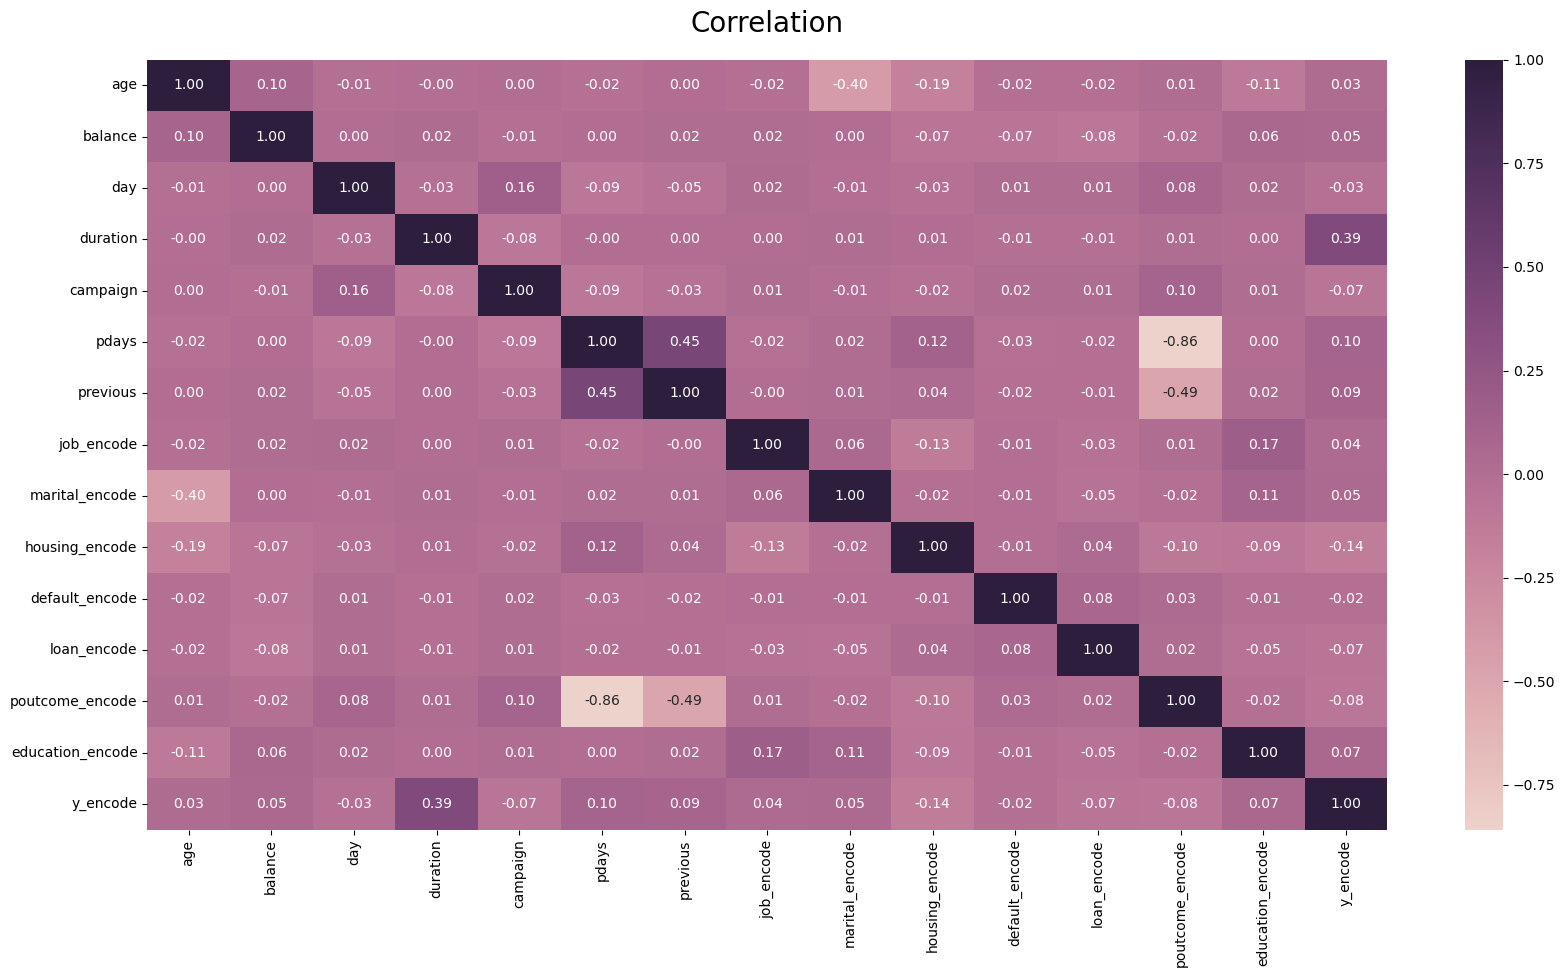

In [17]:
#Pembuatan Heatmap
plt.figure(figsize=(20,10))
heatmaps=sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt='.2f')
heatmaps.set_title('Correlation', fontdict={'fontsize':20}, pad=20);

> There are not many large correlation values in the target column with the features column, the biggest correlation with the target column is the duration column. However, there are other columns that have a high correlation, such as poutcome_encode with pdays and previous with potcome_encode.

### a. Categorical Data Analysis

In [18]:
categorical_col = list(df.select_dtypes("object").columns)
categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [19]:
df[categorical_col].describe().transpose()

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


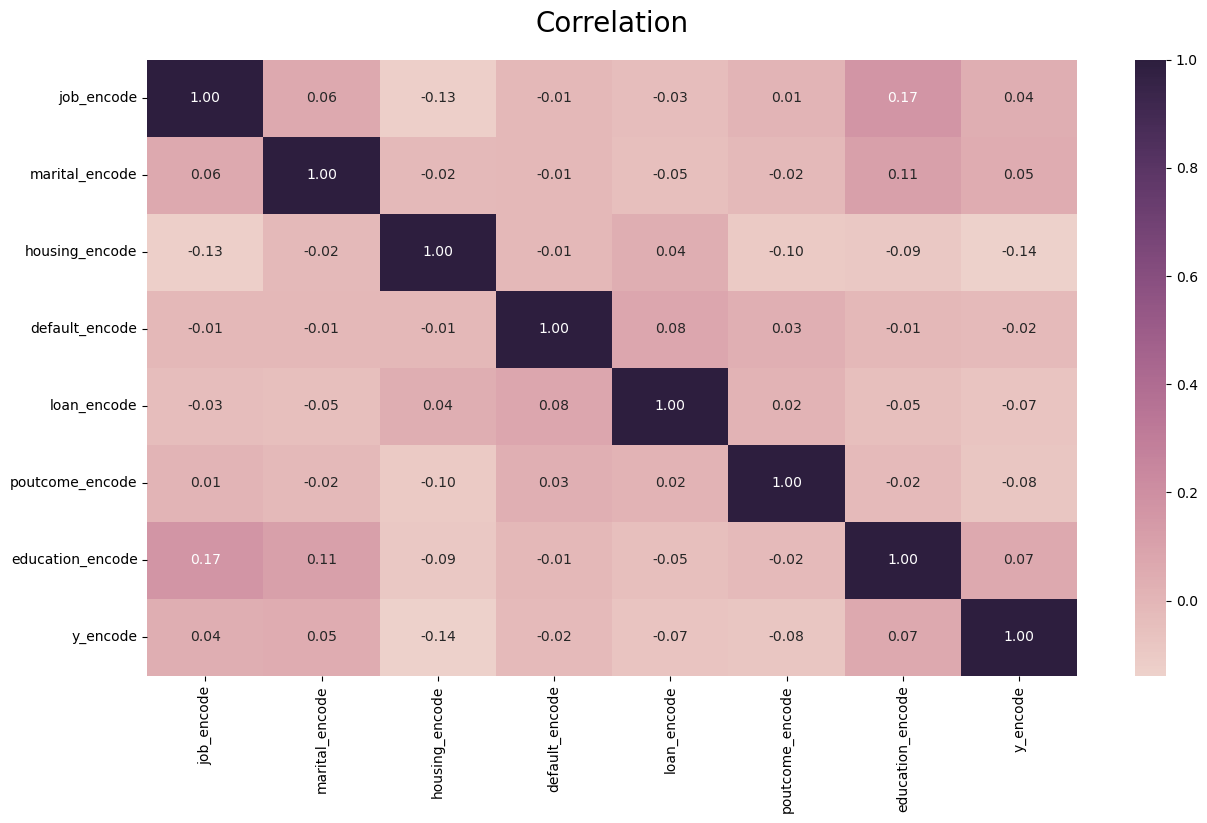

In [20]:
#Pembuatan Heatmap
plt.figure(figsize=(15,8))
heatmaps=sns.heatmap(df[categorical_column].corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt='.2f')
heatmaps.set_title('Correlation', fontdict={'fontsize':20}, pad=20);

In [21]:
def categorical(column):
    fig, ax = plt.subplots(ncols= 1, figsize = (20,10))
    sns.countplot(x=column, hue="y", data=df)
    plt.legend(labels=["No", "Yes"])
    plt.title(column.capitalize() + " vs Yes or No")
    plt.show()
    # Melihat detail angka pada grafik tersebut
    data = pd.crosstab(df[column],df["y"])
    data["yes percentage"] = data["yes"]/(data["yes"]+data["no"])
    data["no percentage"] = data["no"]/(data["yes"]+data["no"])
    # menghitung persentase orang yang memiliki "kolom" berbeda
    data["percentage of "+ column] = round(df[column].value_counts()/df.shape[0] * 100,2)
    return data.sort_values(by=["yes", "yes percentage"], ascending = False)

#### Job

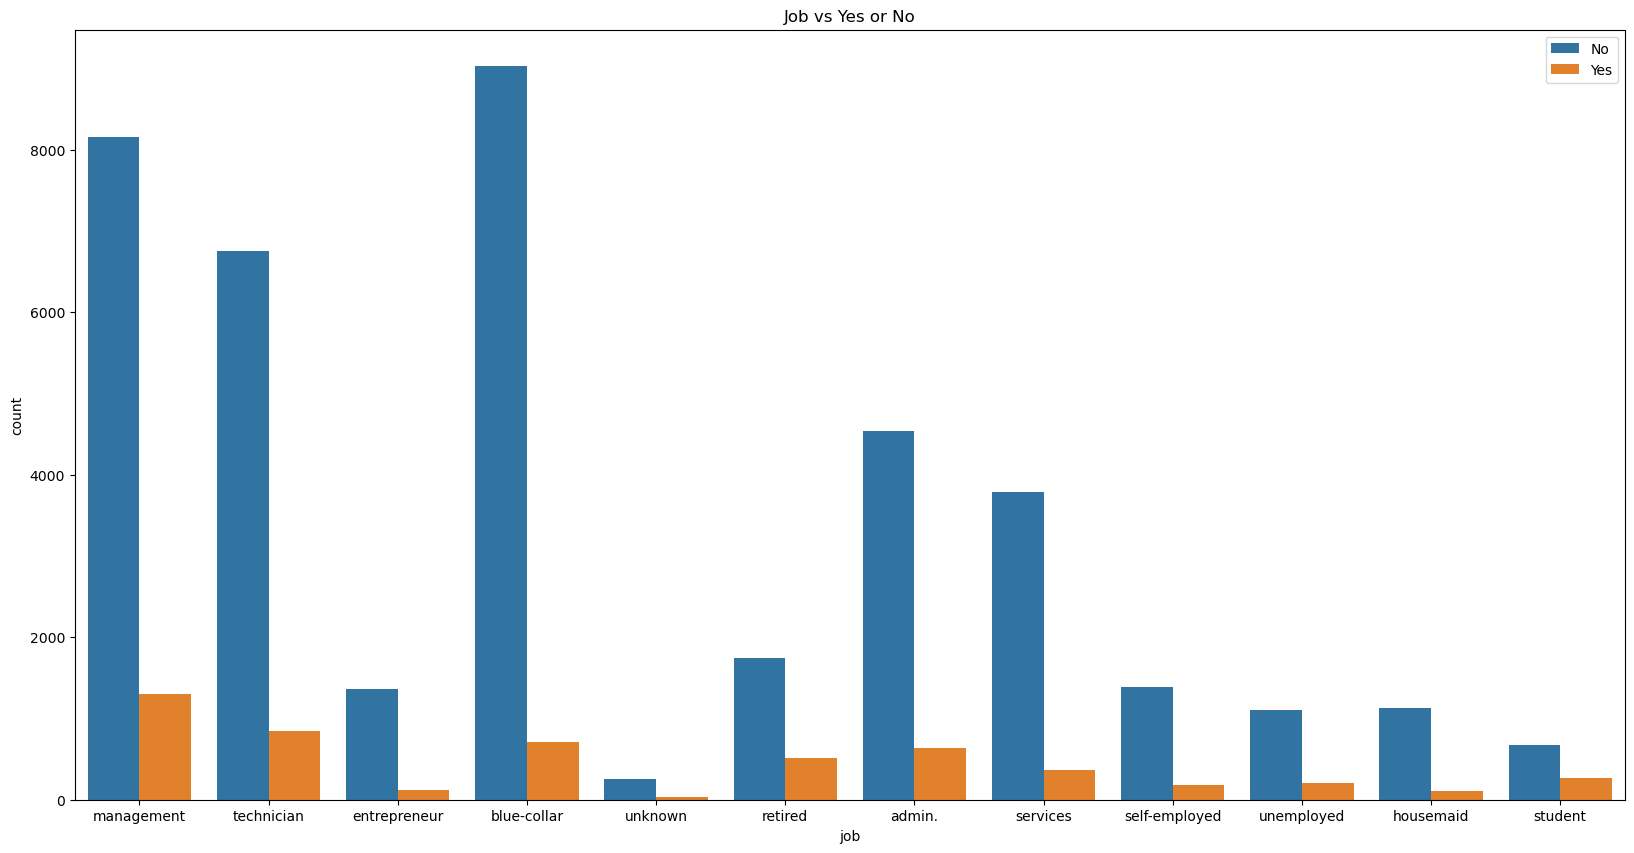

y,no,yes,yes percentage,no percentage,percentage of job
job,,,,,
management,8157,1301,0.137556,0.862444,20.92
technician,6757,840,0.110570,0.889430,16.80
blue-collar,9024,708,0.072750,0.927250,21.53
admin.,4540,631,0.122027,0.877973,11.44
retired,1748,516,0.227915,0.772085,5.01
services,3785,369,0.088830,0.911170,9.19
student,669,269,0.286780,0.713220,2.07
unemployed,1101,202,0.155027,0.844973,2.88
self-employed,1392,187,0.118429,0.881571,3.49


In [22]:
categorical("job")

> Based on the graphs and tables, the job with the most subscriptions to deposits is management with a total of 1301. This is reasonable because management work is the most common job in the data, which is 20.92%.

> Meanwhile, the largest percentage based on work is retired and student, respectively 28.7% and 22.7%.

#### Marital

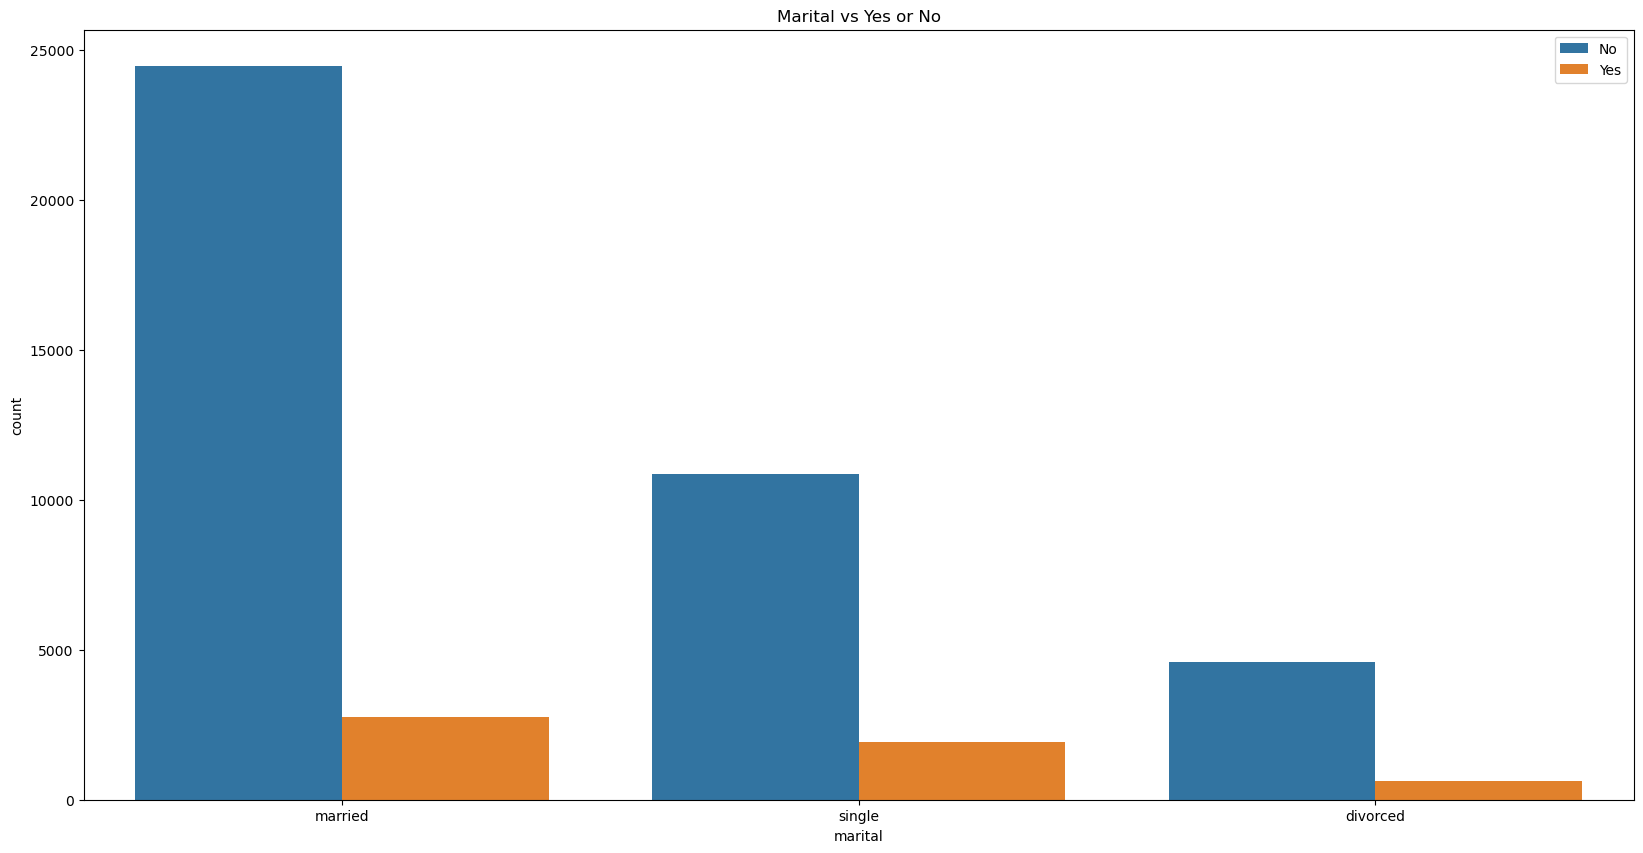

y,no,yes,yes percentage,no percentage,percentage of marital
marital,,,,,
married,24459,2755,0.101235,0.898765,60.19
single,10878,1912,0.149492,0.850508,28.29
divorced,4585,622,0.119455,0.880545,11.52


In [23]:
categorical("marital")

> Based on these tables and graphs, there is no significant effect based on marital status. All three have the same percentage of yes and no in almost every marital status.

#### Education

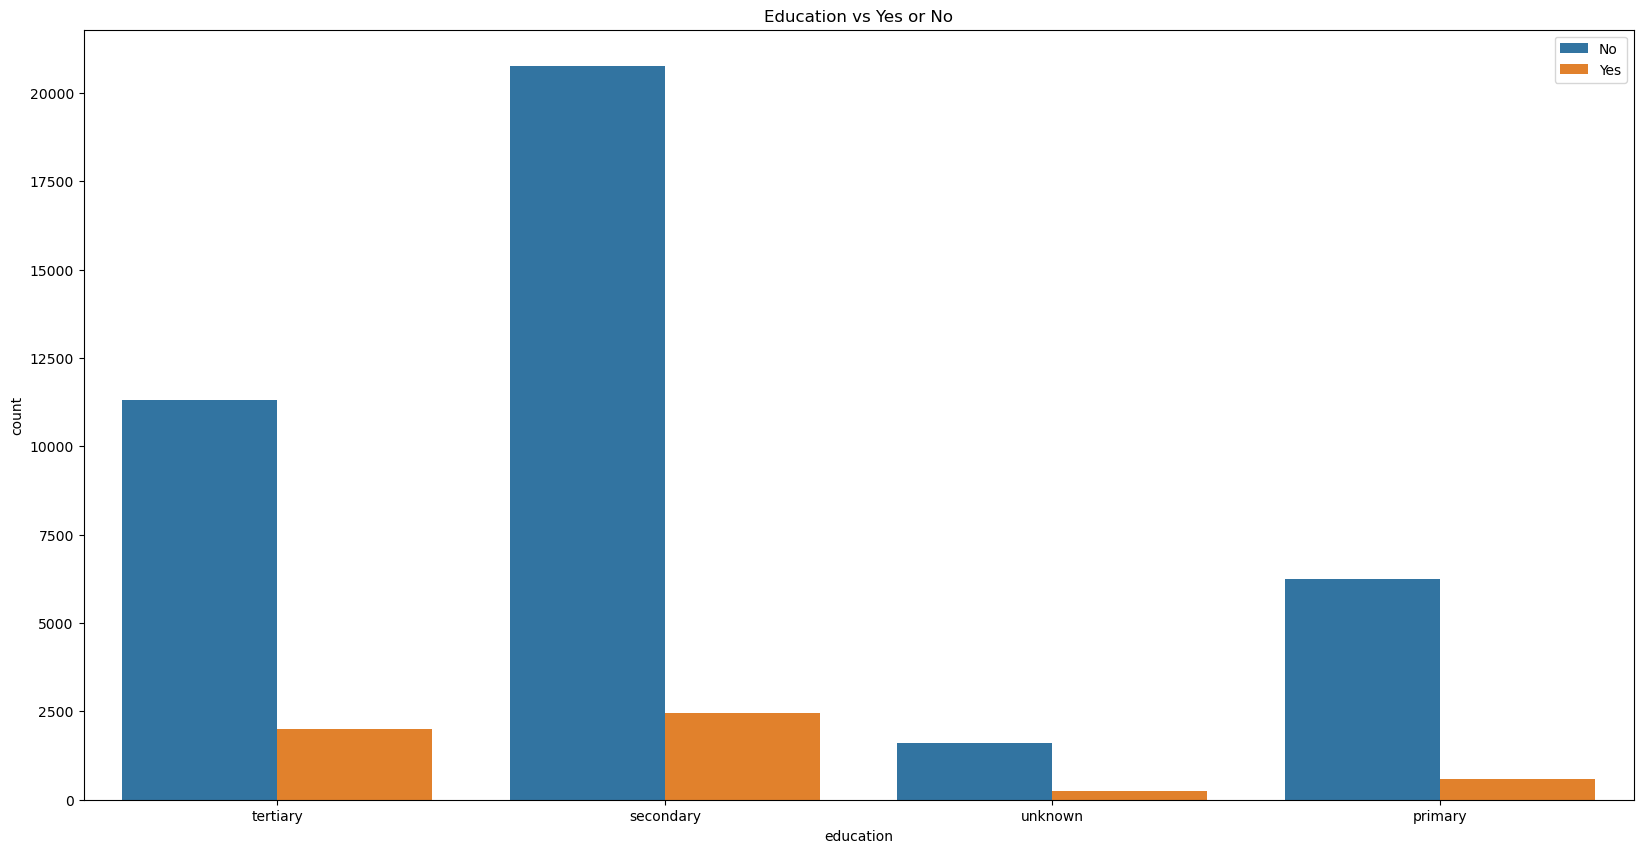

y,no,yes,yes percentage,no percentage,percentage of education
education,,,,,
secondary,20752,2450,0.105594,0.894406,51.32
tertiary,11305,1996,0.150064,0.849936,29.42
primary,6260,591,0.086265,0.913735,15.15
unknown,1605,252,0.135703,0.864297,4.11


In [24]:
categorical("education")

> The education with the highest yes percentage is tertiary, which is 15%, but the difference in yes percentage between other levels of education is not too far so that education does not significantly affect subscriptions.

#### Default

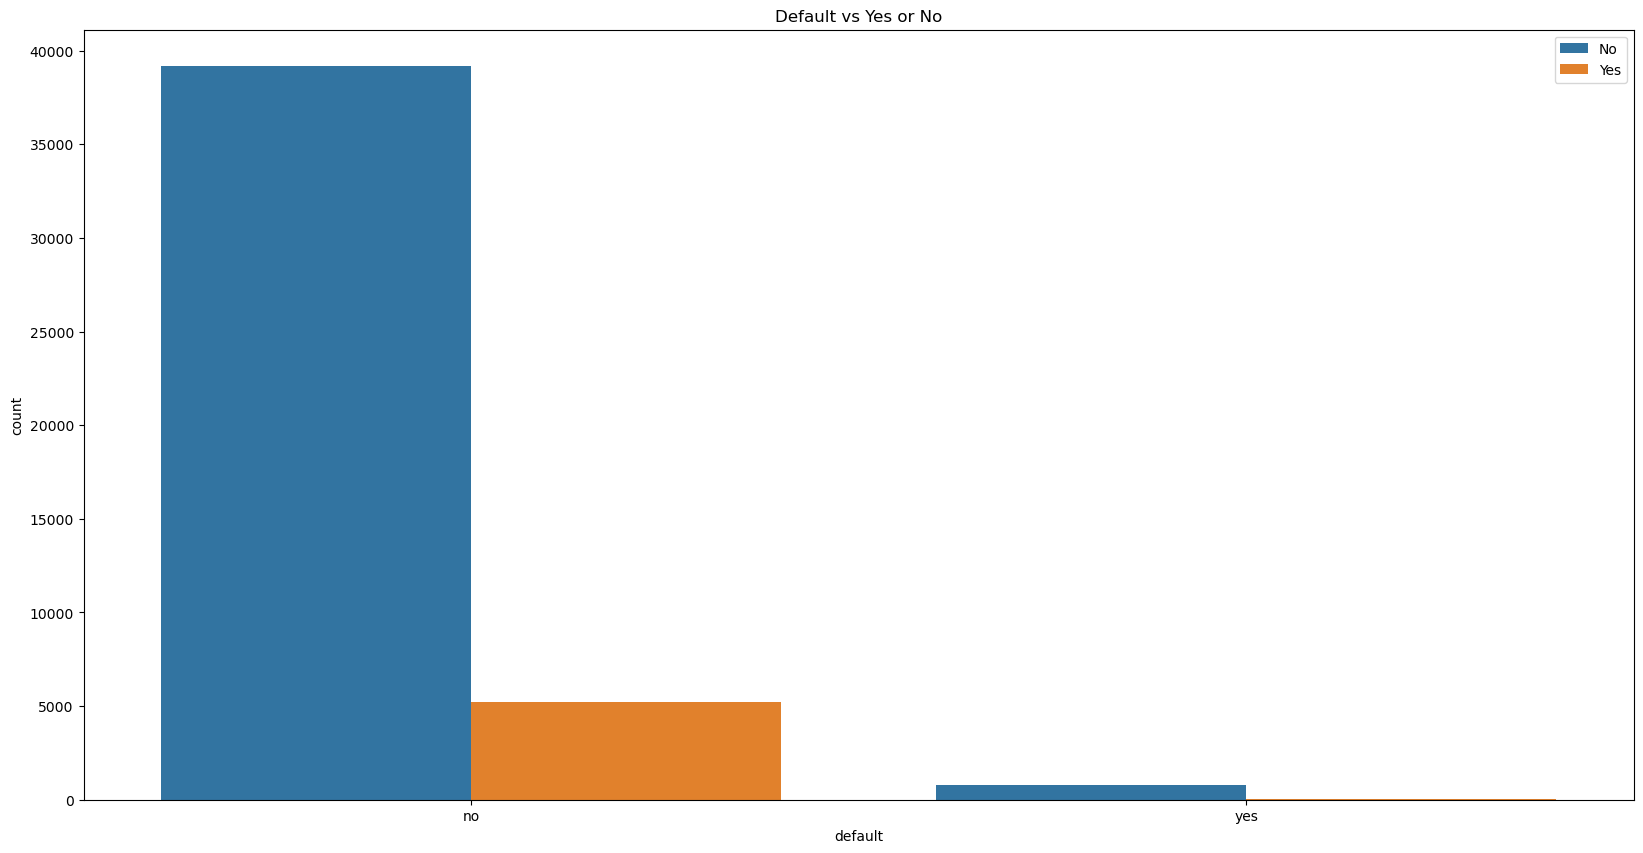

y,no,yes,yes percentage,no percentage,percentage of default
default,,,,,
no,39159,5237,0.117961,0.882039,98.2
yes,763,52,0.063804,0.936196,1.8


In [25]:
categorical("default")

> Most of the marketing done goes to people whose credit defaults are not, and after the campaign there are 11% who subscribe to deposits.

#### Housing

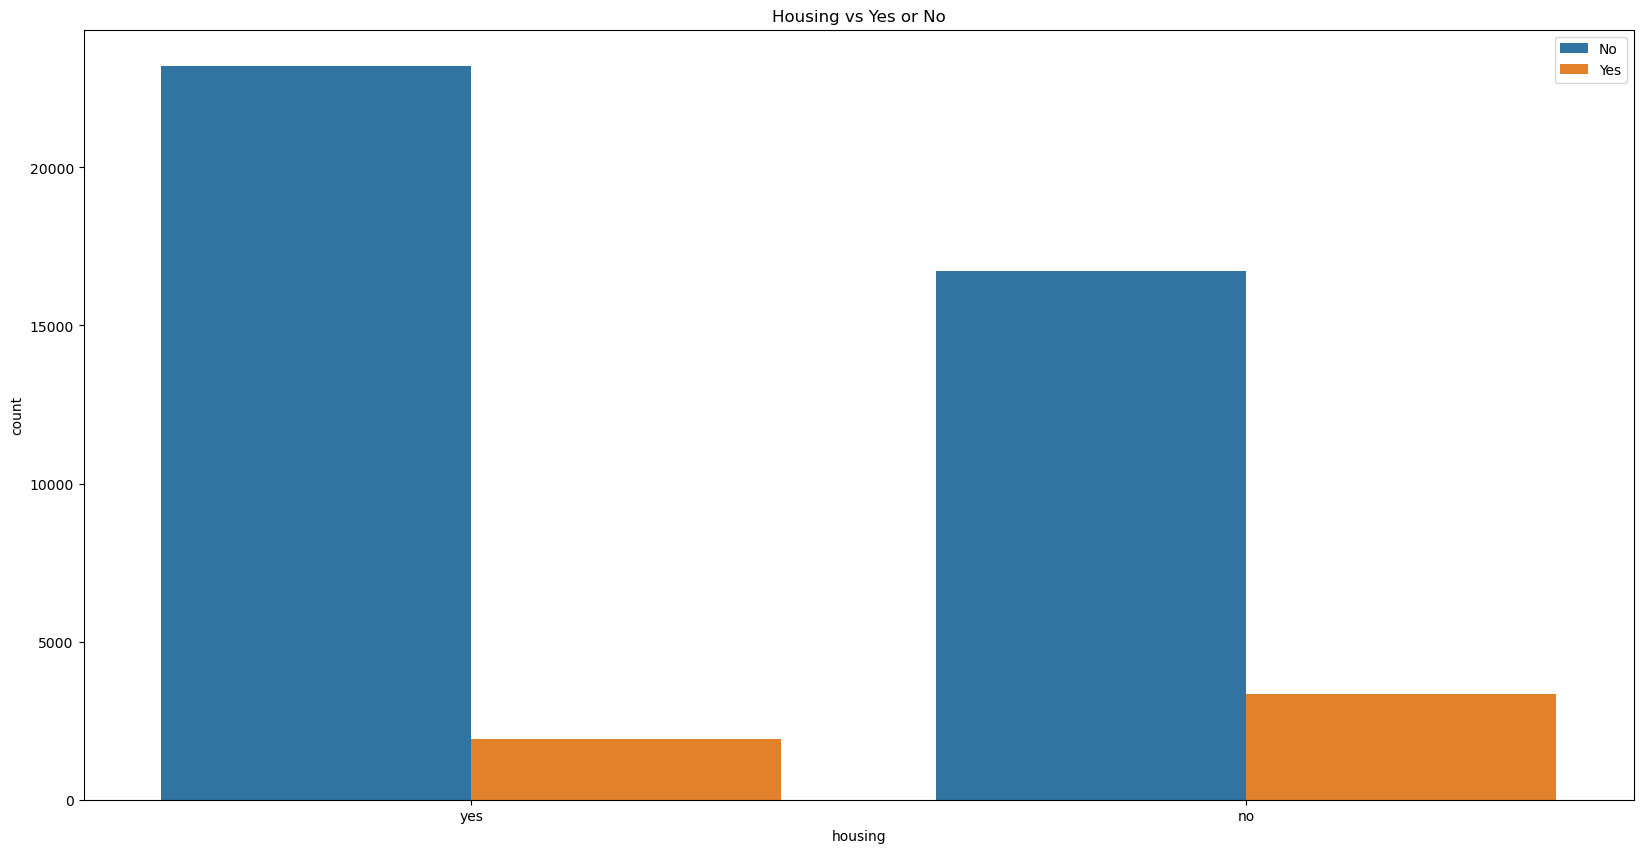

y,no,yes,yes percentage,no percentage,percentage of housing
housing,,,,,
no,16727,3354,0.167024,0.832976,44.42
yes,23195,1935,0.077000,0.923000,55.58


In [26]:
categorical("housing")

> Based on the graphs and tables, it is quite obvious that there is a significant effect of the presence or absence of a home loan. Of people who do not have a home loan, there are 16% who subscribe to deposits, while those who have a home loan are only 7.7%. Although the percentage who subscribe to deposits is not too large, it is quite significant when compared to people who have loans for houses. Therefore, the presence or absence of a home loan is one of the factors that can cause someone to decide to subscribe to a deposit or not.

#### Loan

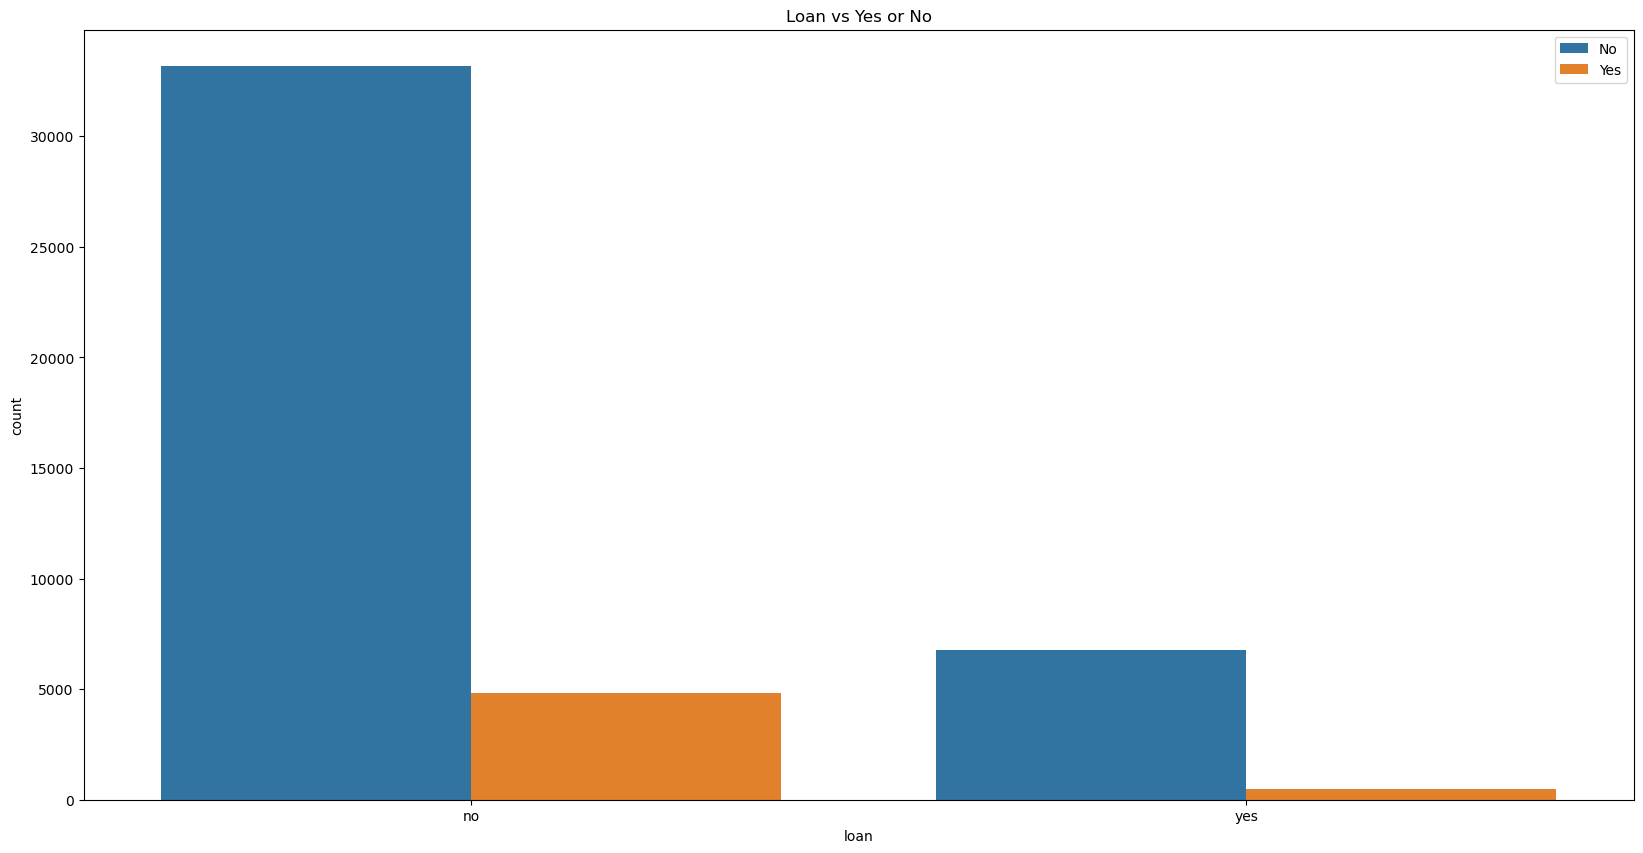

y,no,yes,yes percentage,no percentage,percentage of loan
loan,,,,,
no,33162,4805,0.126557,0.873443,83.98
yes,6760,484,0.066814,0.933186,16.02


In [27]:
categorical("loan")

> Based on the graphs and tables, the proportion obtained is higher for subscribing when someone does not have a loan, which is 12.6%. While someone who has a loan is only 6.7%. This can be achieved because in general someone who does not have a loan will have more money to save, people who have a loan do not because they are lending to other people.

#### Contact

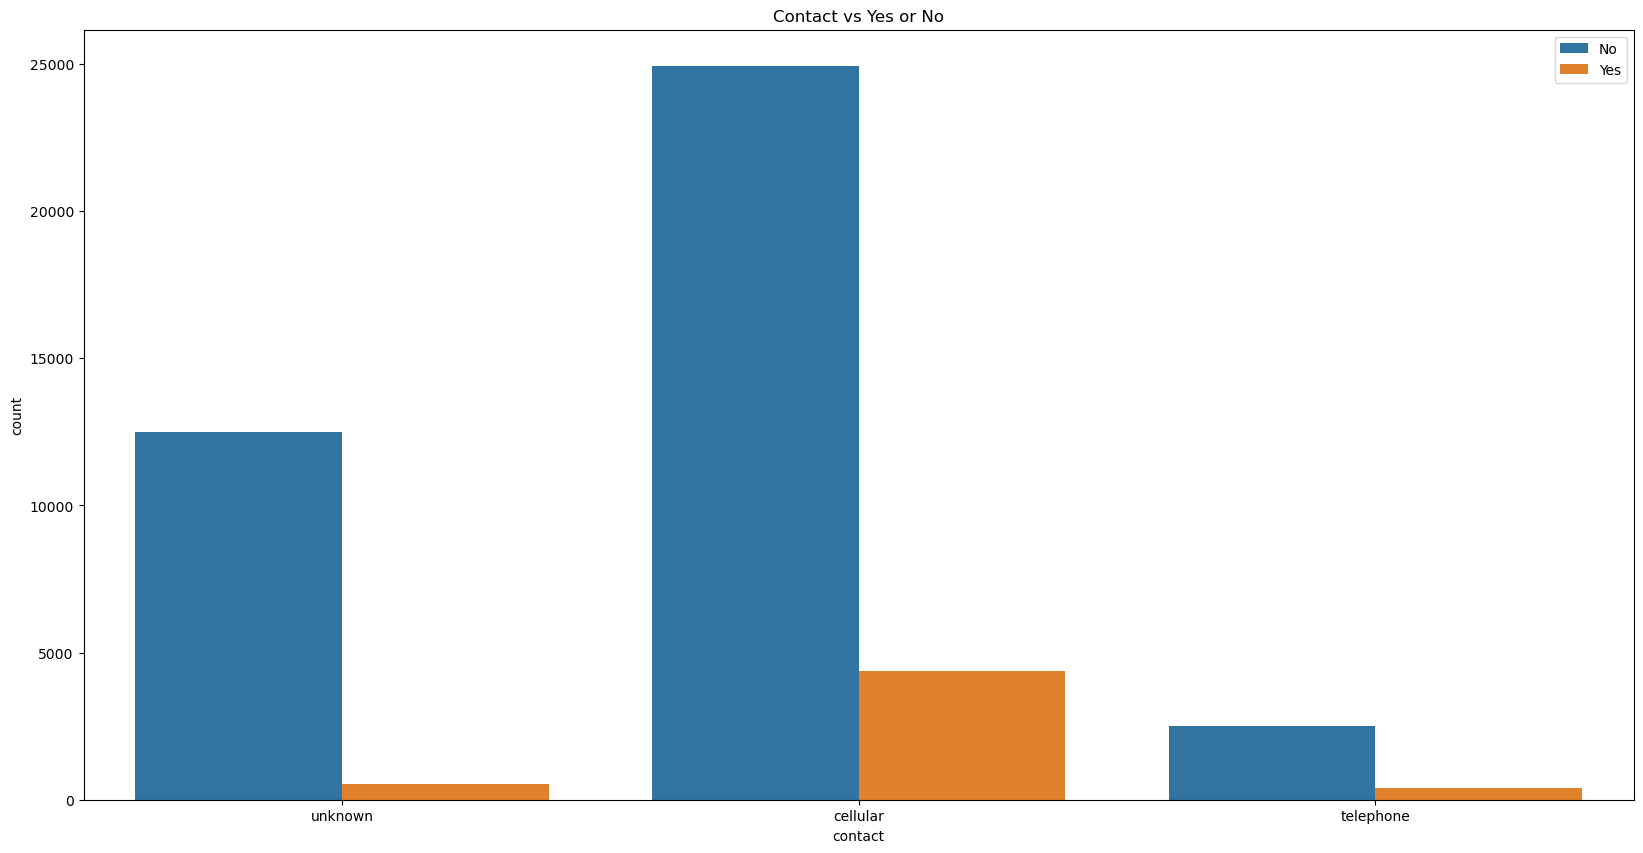

y,no,yes,yes percentage,no percentage,percentage of contact
contact,,,,,
cellular,24916,4369,0.149189,0.850811,64.77
unknown,12490,530,0.040707,0.959293,28.80
telephone,2516,390,0.134205,0.865795,6.43


In [28]:
categorical("contact")

> The way of campaigning through cellular and telephone has almost the same percentage yes. While the unknown has a very small yes percentage.

#### Month

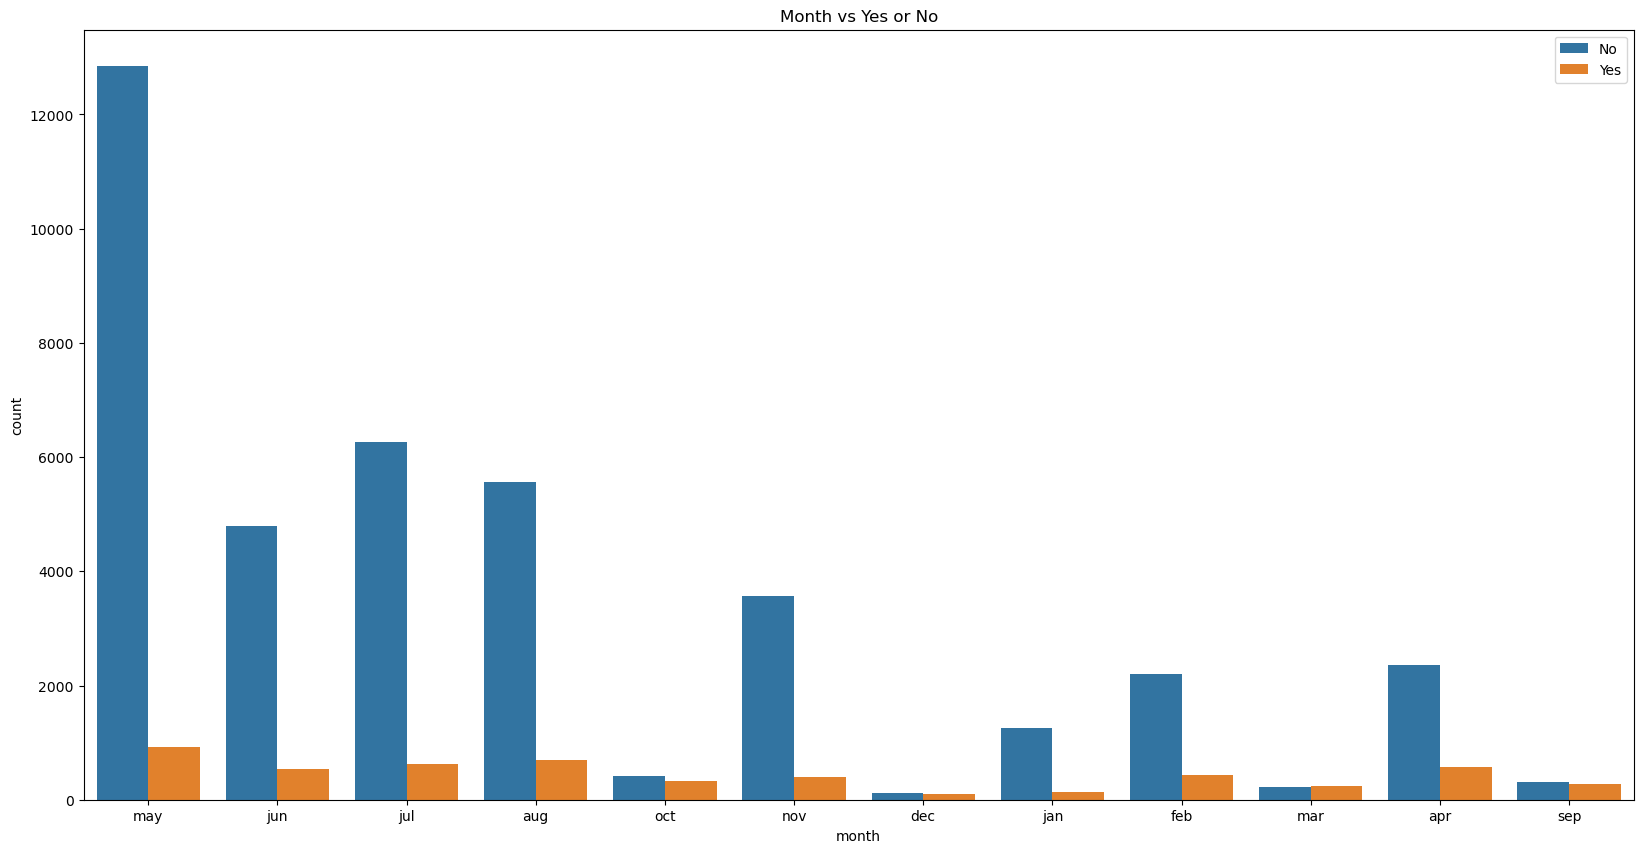

y,no,yes,yes percentage,no percentage,percentage of month
month,,,,,
may,12841,925,0.067195,0.932805,30.45
aug,5559,688,0.110133,0.889867,13.82
jul,6268,627,0.090935,0.909065,15.25
apr,2355,577,0.196794,0.803206,6.49
jun,4795,546,0.102228,0.897772,11.81
feb,2208,441,0.166478,0.833522,5.86
nov,3567,403,0.101511,0.898489,8.78
oct,415,323,0.437669,0.562331,1.63
sep,310,269,0.464594,0.535406,1.28


In [29]:
categorical("month")

> Most recent contacts in a year were in May. This is directly proportional to the number of people who subscribe to deposits, which is 925 (6%). However, the month with the highest percentage yes was in April, which was 19% with a total of 577.

#### Poutcome

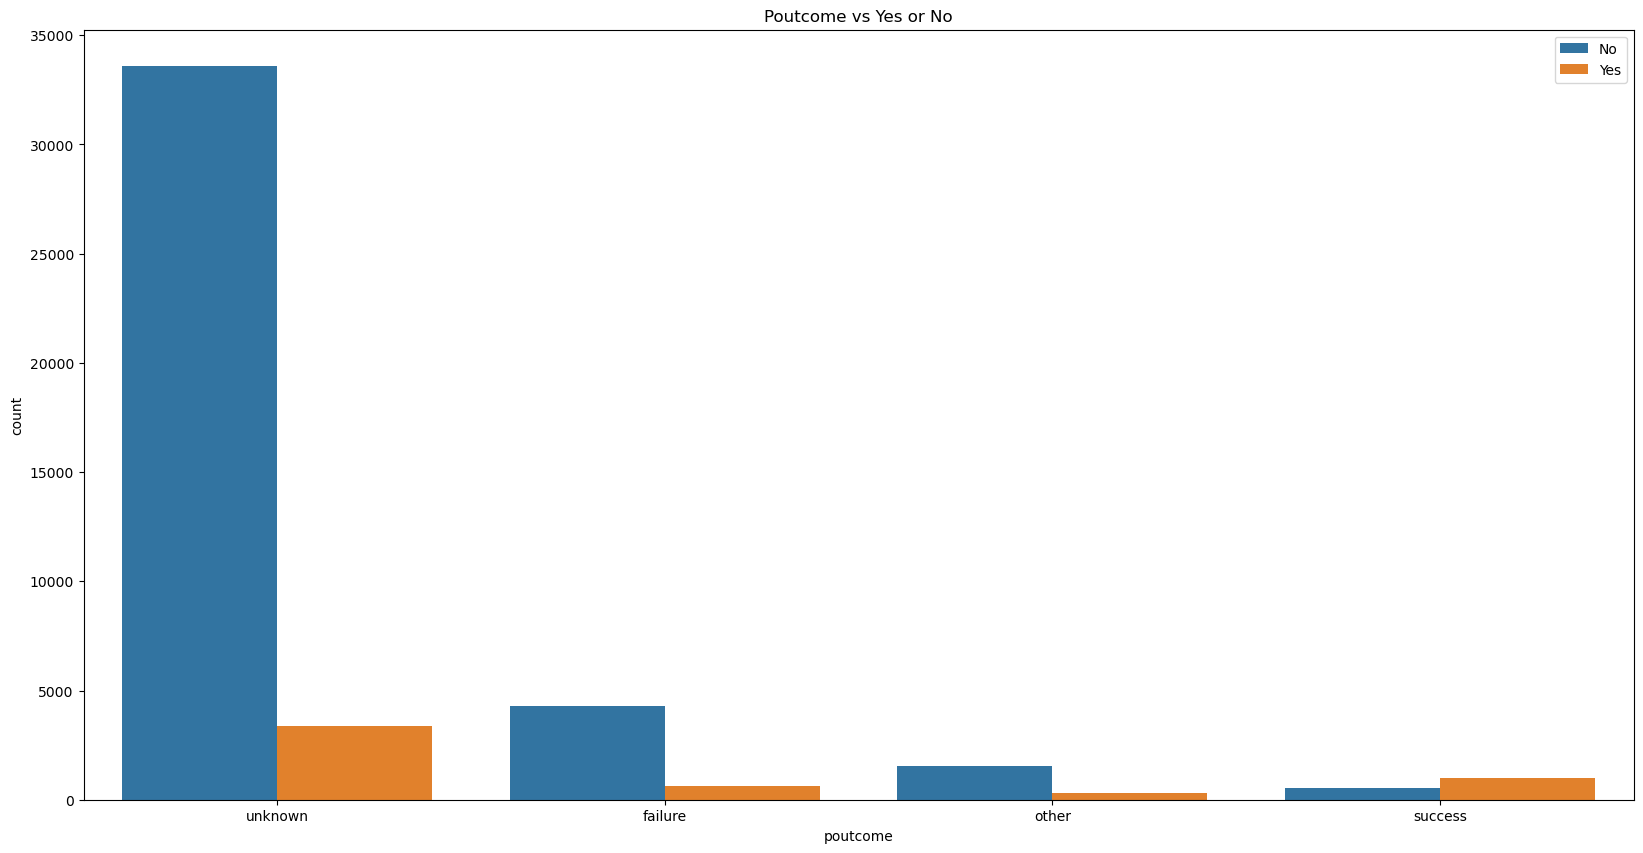

y,no,yes,yes percentage,no percentage,percentage of poutcome
poutcome,,,,,
unknown,33573,3386,0.091615,0.908385,81.75
success,533,978,0.647253,0.352747,3.34
failure,4283,618,0.126097,0.873903,10.84
other,1533,307,0.166848,0.833152,4.07


In [30]:
categorical("poutcome")

> Poutcomes are the result of previous marketing campaigns. In the tables and graphs it can be seen that the results of a successful marketing campaign have a large enough impact for someone to subscribe to a deposit. This can be seen from the success column yes percentage, where a value of 64.7% is obtained with a total of 978 who subscribe to deposits. Therefore, the results of the previous successful campaign had a great impact and became one of the significant factors on the number of deposit customers.

### b. Numerical Data Analysis

In [31]:
numerical_col = list(df.select_dtypes("int64").columns)
numerical_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [32]:
def numerical(kolom):
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    # Kolom Age dengan Attrition
    plt.figure(figsize=(6,4))
    sns.distplot(df[kolom][df["y"]=="no"], color = "g", label = "No", ax=ax[1])
    sns.distplot(df[kolom][df["y"]=="yes"], color = "r", label = "Yes", ax=ax[1])
    ax[1].legend()
    ax[1].grid()
    
    #boxplot for comparison
    sns.boxplot(x = kolom, y = "y", data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + "y" + " vs " + kolom)
    
    plt.show()
            
    a = print("Nilai minimum pada kolom", kolom, "adalah", df[kolom].min() )
    b = print("Nilai maksimum pada kolom", kolom, "adalah", df[kolom].max() )
    
    # Melihat detail angka pada grafik tersebut
    data = pd.crosstab(df[kolom],df["y"])
    data["yes percentage"] = data["yes"]/(data["yes"]+data["no"])
    data["no percentage"] = data["no"]/(data["yes"]+data["no"])
    
    return data.sort_values(by=["yes", "yes percentage"], ascending=False)

#### Age

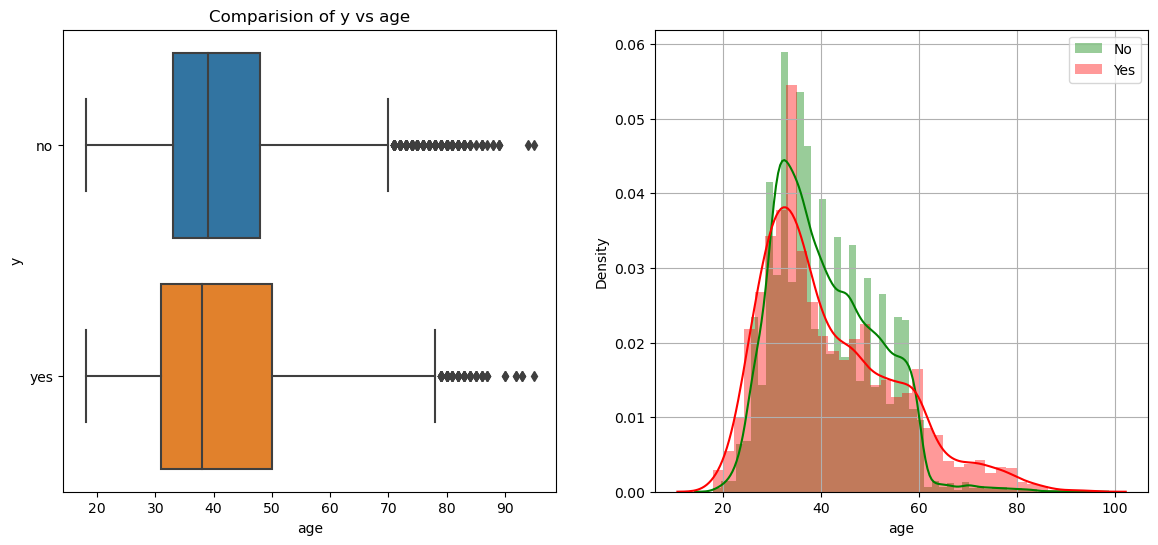

<Figure size 600x400 with 0 Axes>

Nilai minimum pada kolom age adalah 18
Nilai maksimum pada kolom age adalah 95


y,no,yes,yes percentage,no percentage
age,,,,
32,1864,221,0.105995,0.894005
30,1540,217,0.123506,0.876494
33,1762,210,0.106491,0.893509
35,1685,209,0.110348,0.889652
31,1790,206,0.103206,0.896794
...,...,...,...,...
93,0,2,1.000000,0.000000
95,1,1,0.500000,0.500000
88,2,0,0.000000,1.000000


In [33]:
numerical("age")

> Based on the age distribution table, it can be seen that yes the percentage will be large in the age range > 60. This is in accordance with the previous analysis on Categorical Jobs, where the retired type is the largest percentage.

#### Balance

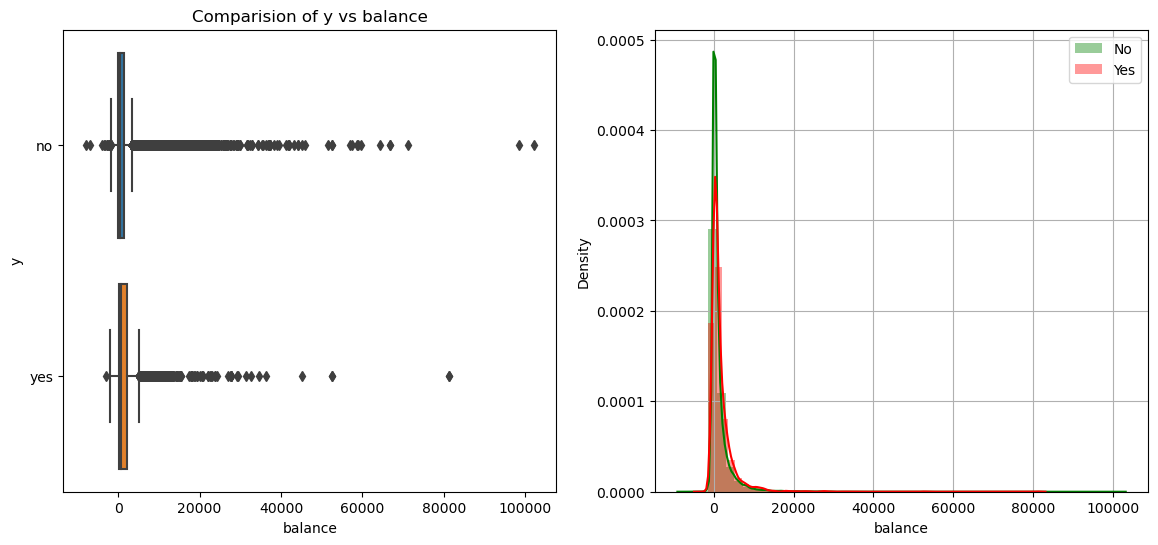

<Figure size 600x400 with 0 Axes>

Nilai minimum pada kolom balance adalah -8019
Nilai maksimum pada kolom balance adalah 102127


y,no,yes,yes percentage,no percentage
balance,,,,
0,3222,292,0.083096,0.916904
1,178,17,0.087179,0.912821
2,140,16,0.102564,0.897436
5,98,15,0.132743,0.867257
294,22,12,0.352941,0.647059
...,...,...,...,...
66653,1,0,0.000000,1.000000
66721,1,0,0.000000,1.000000
71188,1,0,0.000000,1.000000


In [34]:
numerical("balance")

> The highest contribution is at the average annual balance of 0. There are 292 customers who are deposit customers at balance = 0.

#### Day

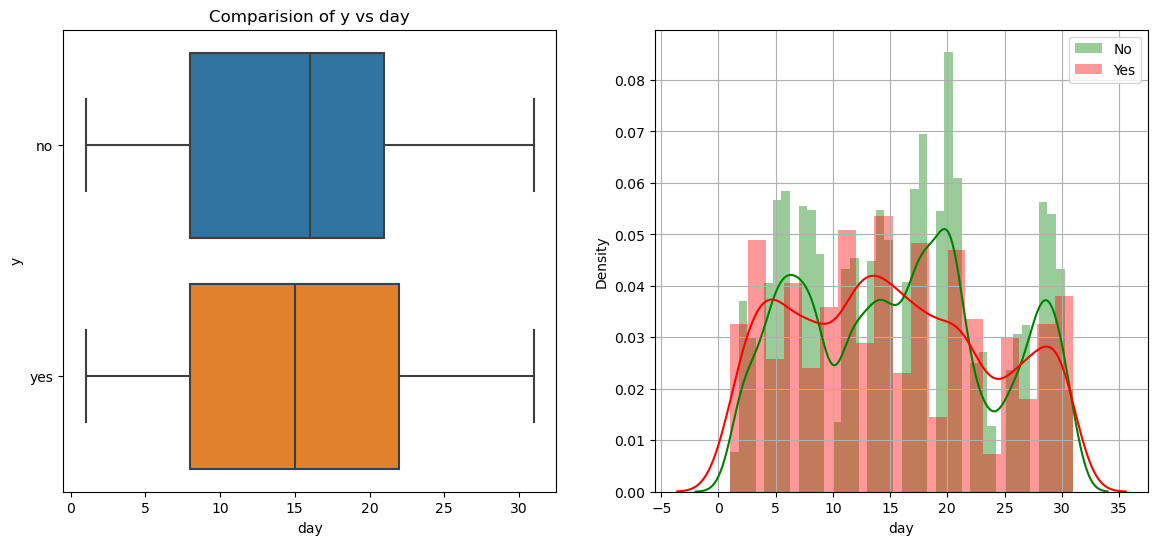

<Figure size 600x400 with 0 Axes>

Nilai minimum pada kolom day adalah 1
Nilai maksimum pada kolom day adalah 31


y,no,yes,yes percentage,no percentage
day,,,,
30,1295,271,0.173052,0.826948
12,1359,244,0.152215,0.847785
13,1344,241,0.152050,0.847950
15,1465,238,0.139753,0.860247
4,1215,230,0.159170,0.840830
18,2080,228,0.098787,0.901213
5,1695,215,0.112565,0.887435
14,1638,210,0.113636,0.886364
8,1641,201,0.109121,0.890879


In [35]:
numerical("day")   

> Seen at the end of the month (30) is the highest number for someone to subscribe to deposits.

#### Duration

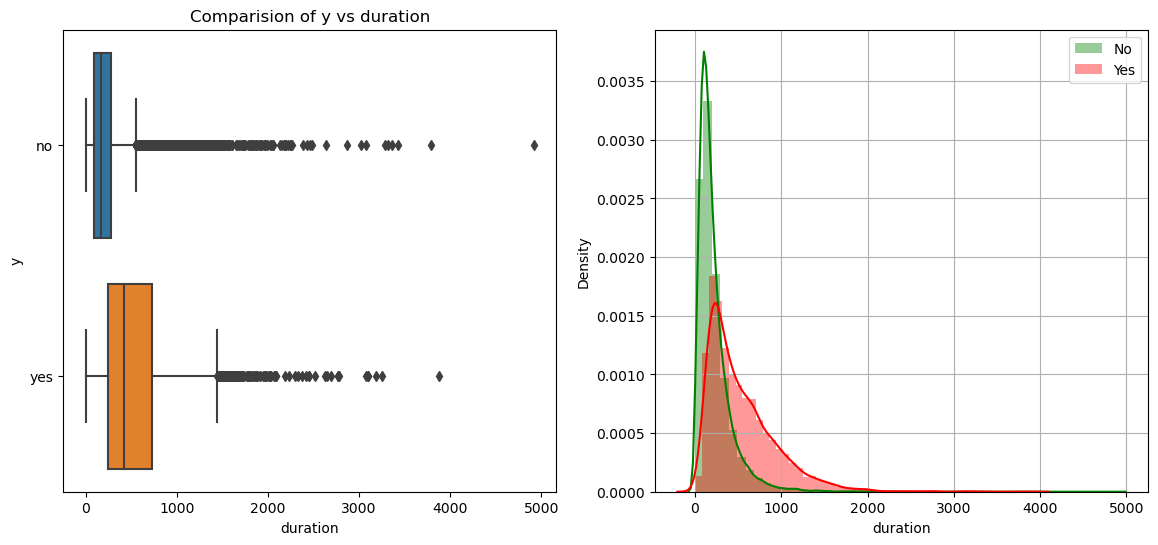

<Figure size 600x400 with 0 Axes>

Nilai minimum pada kolom duration adalah 0
Nilai maksimum pada kolom duration adalah 4918


y,no,yes,yes percentage,no percentage
duration,,,,
261,54,19,0.260274,0.739726
226,101,17,0.144068,0.855932
229,71,16,0.183908,0.816092
232,74,16,0.177778,0.822222
187,104,16,0.133333,0.866667
...,...,...,...,...
3322,1,0,0.000000,1.000000
3366,1,0,0.000000,1.000000
3422,1,0,0.000000,1.000000


In [36]:
numerical("duration")

In [37]:
df.groupby("y")["duration"].mean()

y
no     221.182806
yes    537.294574
Name: duration, dtype: float64

> The last contact duration in seconds seems successful enough to attract deposit customers at more than 537 seconds. This makes sense because when the communication is long, it proves that the intended person is someone who is interested in the deposit campaign.

#### Campaign

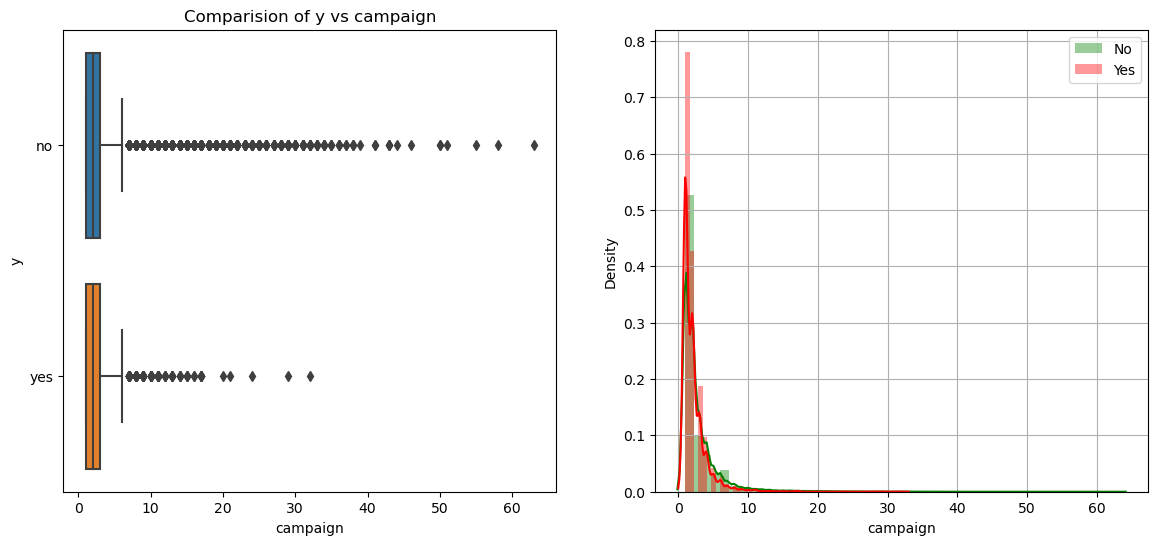

<Figure size 600x400 with 0 Axes>

Nilai minimum pada kolom campaign adalah 1
Nilai maksimum pada kolom campaign adalah 63


y,no,yes,yes percentage,no percentage
campaign,,,,
1,14983,2561,0.145976,0.854024
2,11104,1401,0.112035,0.887965
3,4903,618,0.111936,0.888064
4,3205,317,0.090006,0.909994
5,1625,139,0.078798,0.921202
6,1199,92,0.071263,0.928737
7,688,47,0.063946,0.936054
8,508,32,0.059259,0.940741
9,306,21,0.064220,0.935780


In [38]:
numerical("campaign")

> The number of contacts made during the campaign was mostly done at the beginning and very few at the end of the campaign.

#### Pdays

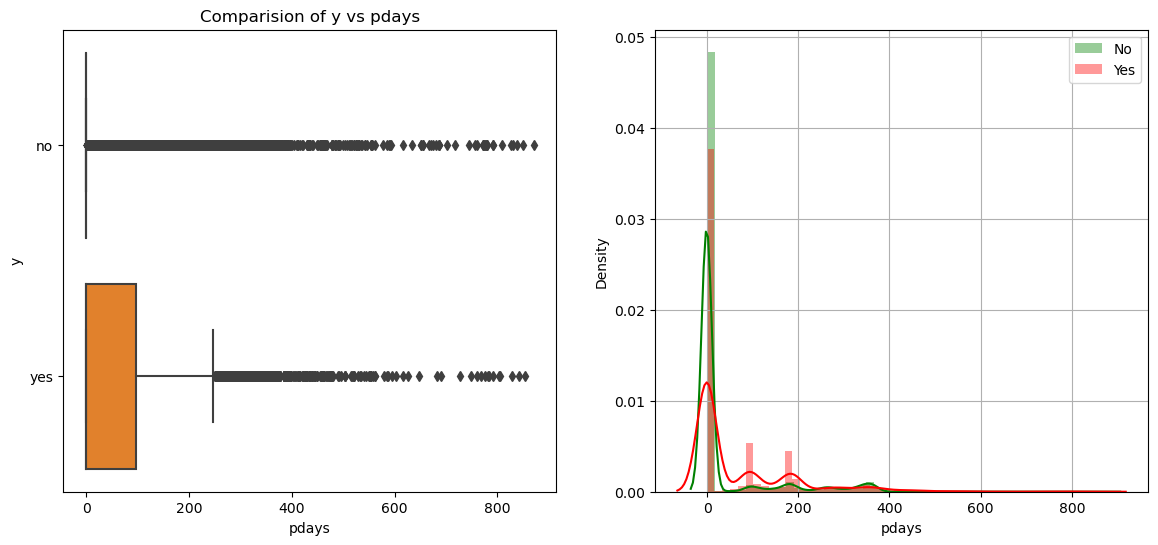

<Figure size 600x400 with 0 Axes>

Nilai minimum pada kolom pdays adalah -1
Nilai maksimum pada kolom pdays adalah 871


y,no,yes,yes percentage,no percentage
pdays,,,,
-1,33570,3384,0.091573,0.908427
92,51,96,0.653061,0.346939
182,87,80,0.479042,0.520958
91,51,75,0.595238,0.404762
181,43,74,0.632479,0.367521
...,...,...,...,...
826,1,0,0.000000,1.000000
831,1,0,0.000000,1.000000
838,1,0,0.000000,1.000000


In [39]:
numerical("pdays")

> -1 means that the client was not contacted in the previous days. This is very because -1 has the most total but very few new subscribers are subscribed. In contrast to 92, 182, 91, and 181 which have the most total new clients and a fairly good proportion. In the table it can also be said that a good day to contact the previous client is 3 - 6 months in advance.

#### Previous

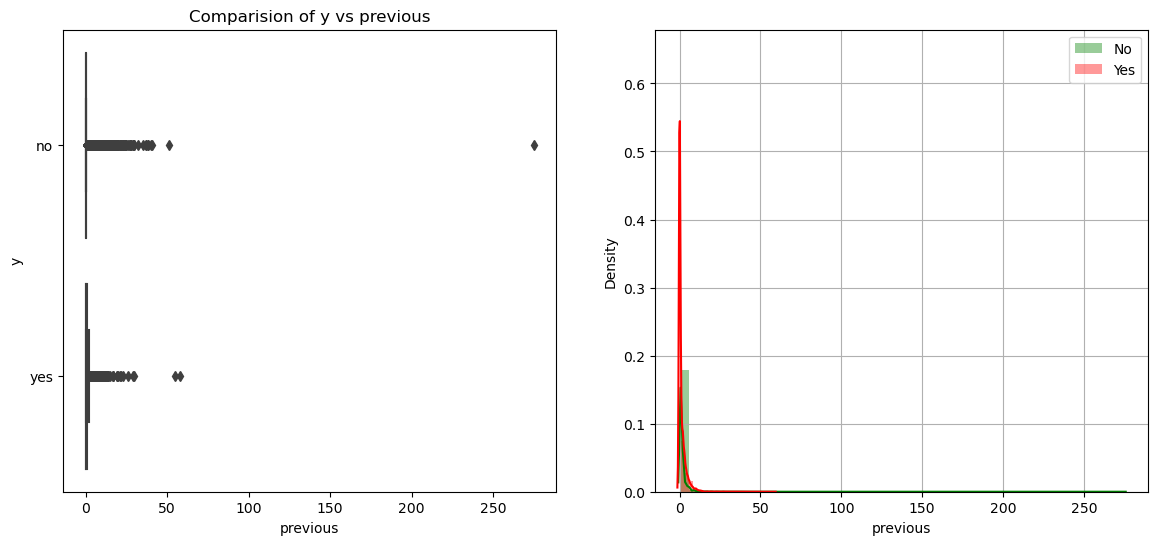

<Figure size 600x400 with 0 Axes>

Nilai minimum pada kolom previous adalah 0
Nilai maksimum pada kolom previous adalah 275


y,no,yes,yes percentage,no percentage
previous,,,,
0,33570,3384,0.091573,0.908427
1,2189,583,0.210317,0.789683
2,1650,456,0.216524,0.783476
3,848,294,0.257443,0.742557
4,543,171,0.239496,0.760504
5,338,121,0.263617,0.736383
6,194,83,0.299639,0.700361
7,151,54,0.263415,0.736585
8,90,39,0.302326,0.697674


In [40]:
numerical("previous")

### c. Multivariate Analysis

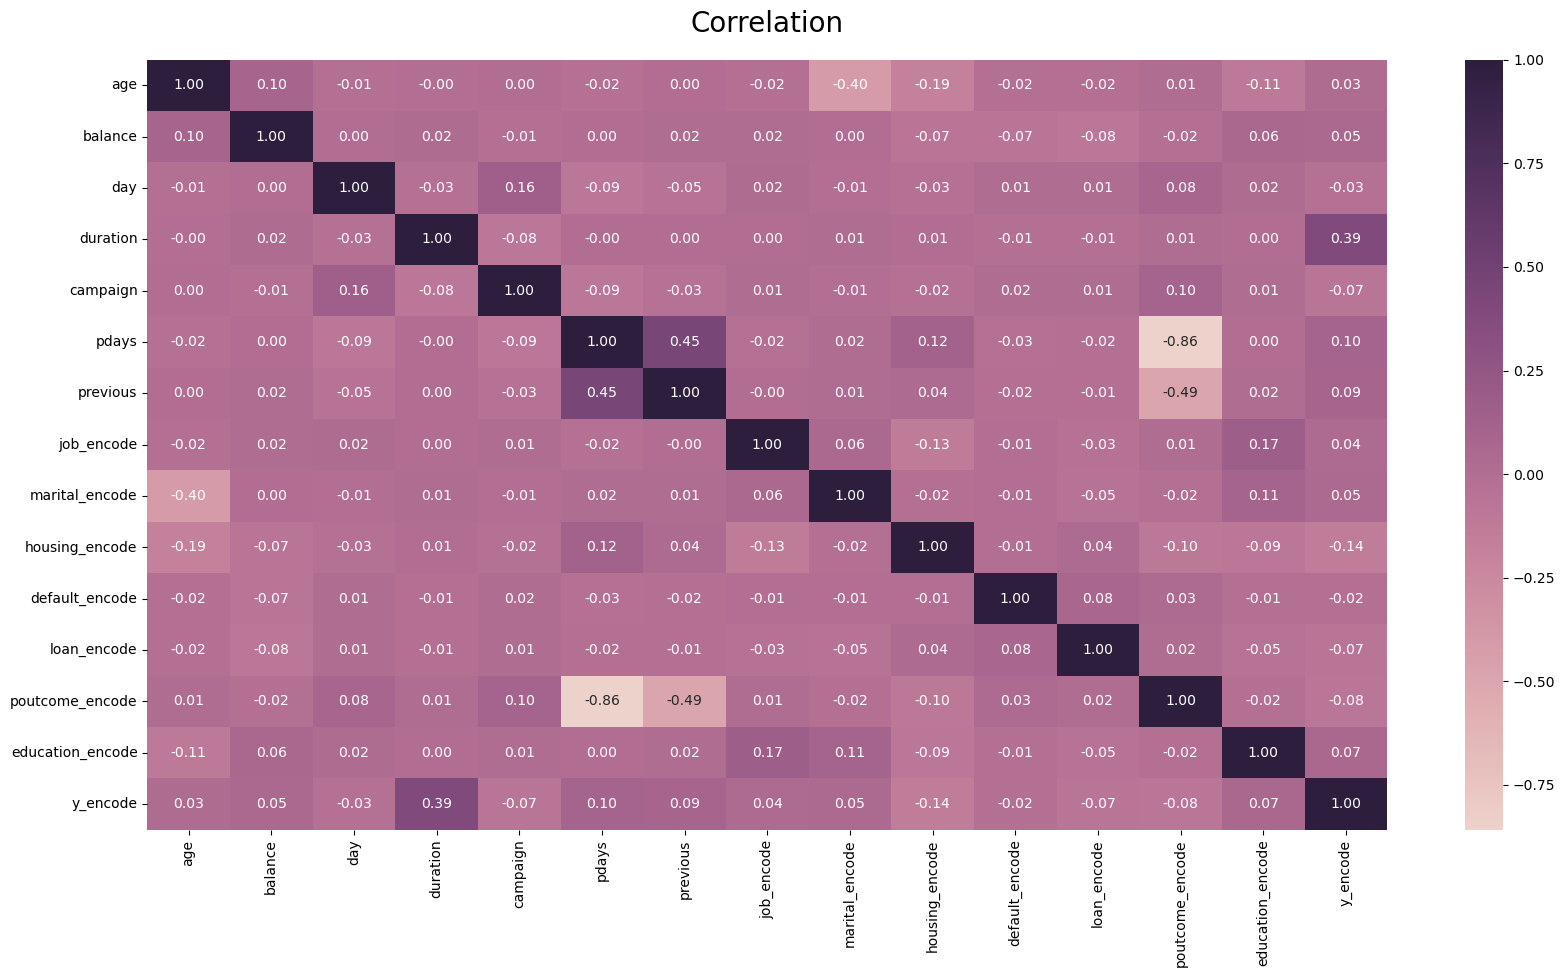

In [41]:
#Pembuatan Heatmap
plt.figure(figsize=(20,10))
heatmaps=sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt='.2f')
heatmaps.set_title('Correlation', fontdict={'fontsize':20}, pad=20);

#### Housing and Balance with Y

In [42]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()
    plt.show()

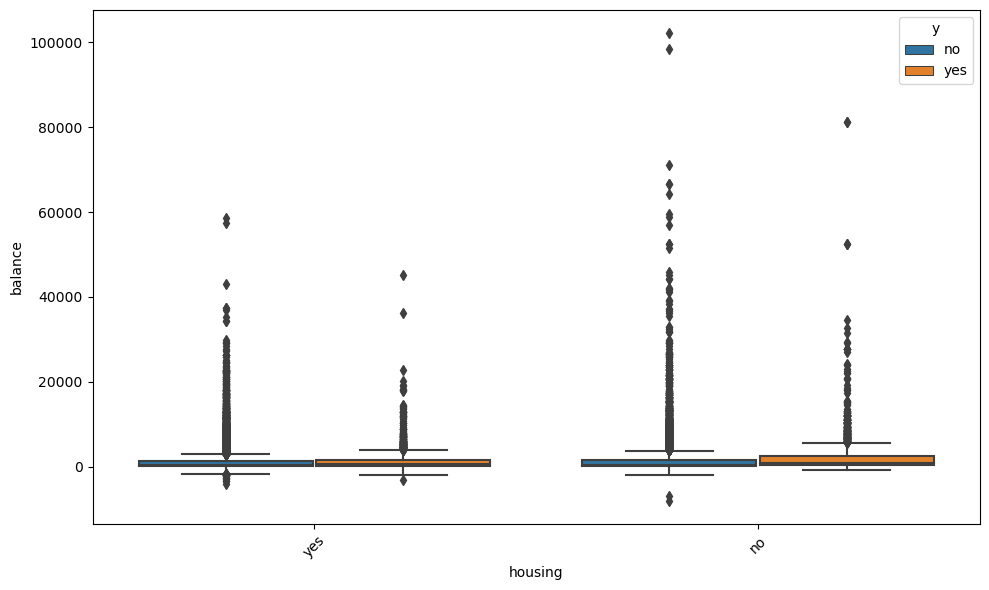

In [43]:
boxes("housing", "balance", "y")

>Here it can be seen that people who do not have a home loan have a larger mean balance than those who have a home loan. Therefore, the boxplot reinforces that someone who does not have a home loan will make a deposit because it has a higher mean balance.

#### Job and Balance with Y

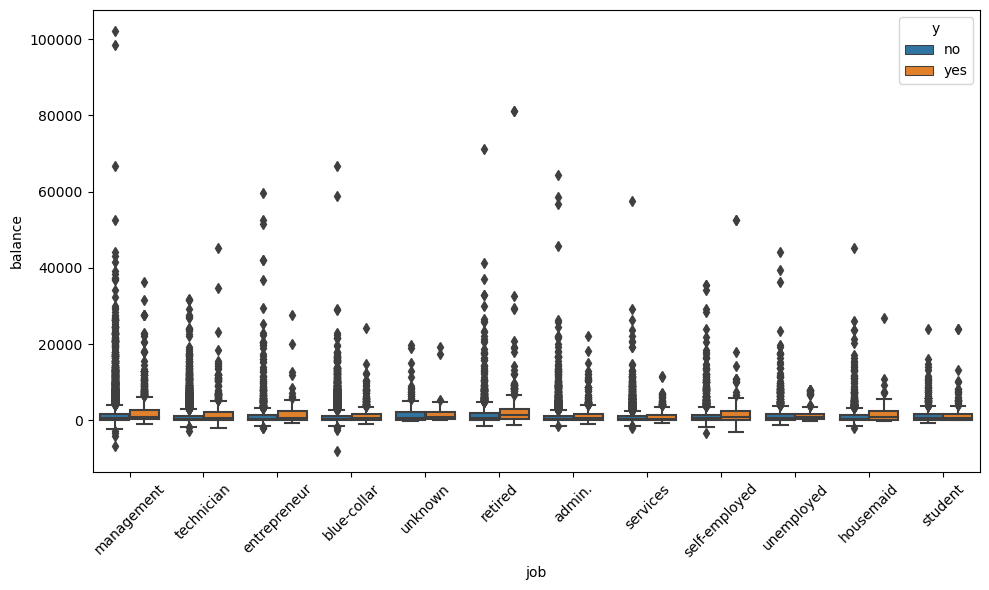

In [44]:
boxes("job", "balance", "y")

In [45]:
df.groupby("job")["balance"].agg(["min", "max", "sum", "mean"]).sort_values(by="mean", ascending=False)

,min,max,sum,mean
job,,,,
retired,-1598,81204,4492263,1984.215106
unknown,-295,19706,510439,1772.357639
management,-6847,102127,16680288,1763.616832
self-employed,-3313,52587,2602146,1647.970868
unemployed,-1270,44134,1982835,1521.745971
entrepreneur,-2082,59649,2262426,1521.470074
housemaid,-1941,45141,1726570,1392.395161
student,-679,24025,1302001,1388.060768
technician,-2827,45248,9516246,1252.632092


> In terms of job categories, the average balance is not much different. But there is something that interests me, namely the retirees who subscribe to deposits. Retirees who subscribe to deposits have a higher average than retirees who do not subscribe.

#### Default and Balance with Y

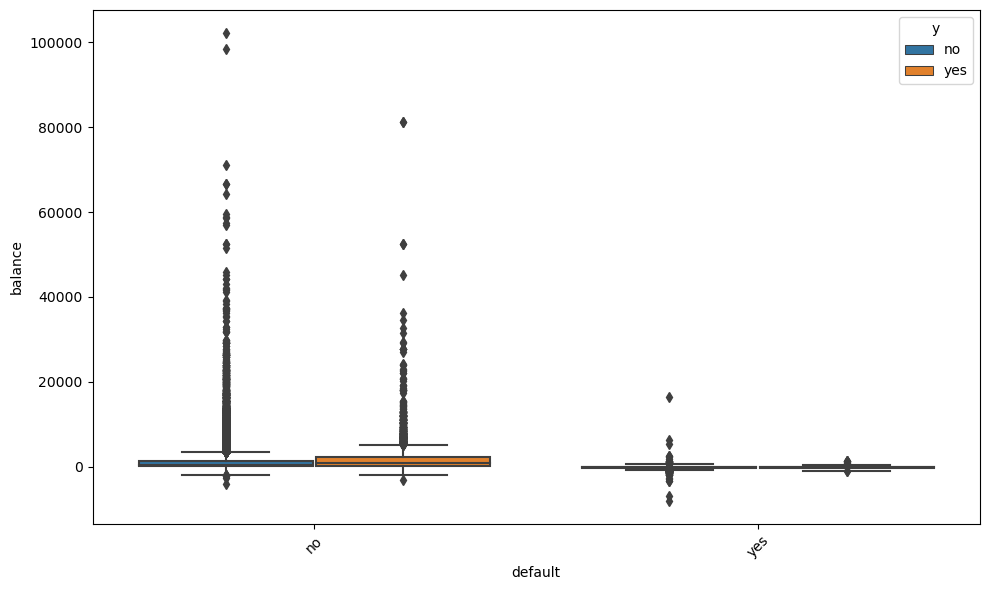

In [46]:
boxes("default", "balance", "y")

> The box plot shows that the composition of no by default is the target market for this campaign. Because it looks very different data between no and yes. In addition, the mean balance of those who become deposit customers is higher than that of those who do not follow deposits.

## Summary

> In the campaign, it succeeded in attracting 5289 subscribers, which is 11.70% of the total. After doing the analysis, the largest percentage of jobs based on occupation are retirees and students, respectively 22.7% and 28.7%. This makes sense because people who have retired usually make deposits on their money. Furthermore, other factors that influence a person to subscribe to a deposit or not have a home loan. It also makes sense that when a person does not have a mortgage on a home, then the burden of not having a mortgage on a home is that they can save and subscribe to a deposit. The next influencing factor is the success of the previous marketing campaign. When the previous marketing campaign was successful, it could have a considerable impact, where 64.7% of the previous campaign succeeded in becoming a deposit subscription. And the last factor is the duration of the last contact, i.e. the longer the contact, the greater the subscription percentage. This is because it is interested in developing that a person is interested in what he is interested in.